# Solución de la ecuación de calor en 1-D


In [1]:
'''
                2         
∂              ∂          
──(u(t, x)) = ───(u(t, x))  +  f(x)
∂t              2         
              ∂x   

En una varilla x ∈ [0.0, 1.0].

Fuente de calor f(x).

Condiciones de borde:
u(0,t) = 0
u(1,t) = = 0

u(x,0) = u_o = sin(pi*x)

Fuente: f(x) = r = 1

'''

'\n                2         \n∂              ∂          \n──(u(t, x)) = ───(u(t, x))  +  f(x)\n∂t              2         \n              ∂x   \n\nEn una varilla x ∈ [0.0, 1.0].\n\nFuente de calor f(x).\n\nCondiciones de borde:\nu(0,t) = 0\nu(1,t) = = 0\n\nu(x,0) = u_o = sin(pi*x)\n\nFuente: f(x) = r = 1\n\n'

In [2]:
from fenics import *
import matplotlib.pyplot as plt

In [3]:
n_puntos_malla = 32 
mesh = UnitIntervalMesh(n_puntos_malla)

In [4]:
# Definir el espacio funcional de prueba (H)
fspace = FunctionSpace(mesh, "Lagrange",  1)

In [5]:
# Condición de frontera (u=0 en los extremos)
def funcion_bool(x, on_boundary):
    return on_boundary

# escribimos la condición del problema
condicion_borde = DirichletBC(fspace, Constant(0.0), funcion_bool)

Text(0.5, 1.0, 'u(x,0)')

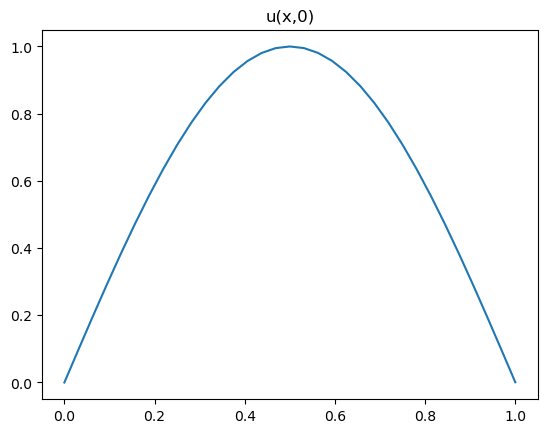

In [6]:
# En problemas evolutivos, a parte de la condición de borde, tenemos una condición inicial
u_o = Expression("sin(3.141*x[0])", degree = 1)

# discretizo la condición inicial
u_n = interpolate(u_o, fspace)

plt.figure()
plot(u_n)
plt.title("u(x,0)")


In [7]:
delta_t = 0.1

In [8]:
# Decirle a Fenics la forma variacional: a(u,v) = lv(f)
# Cuando vamos a repetir iterativamente el cálculo, podemos definir una forma variacional que se repita:

# Define la función u (solución) y v (función prueba)
u = TrialFunction(fspace)
v = TestFunction(fspace)

fuente = Constant(1.0)

forma_variacional = (
u * v * dx  +  delta_t * dot(grad(u), grad(v)) * dx   -
( u_n * v * dx   +  delta_t * fuente * v * dx )
)

# puedo hallar los lados izquierdos y derechos del problema de arriba automáticamente en cualquier iteración

lhs_ecuacion = lhs(forma_variacional) 
rhs_ecuacion = rhs(forma_variacional) 

u_sol = Function(fspace)


Solving linear variational problem.
Solving linear variational problem.


Text(0.5, 1.0, 'solución para diferentes tiempos')

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


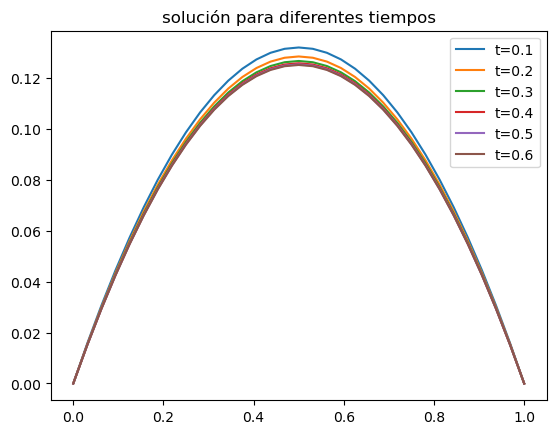

In [10]:
# Ahora resolveré la forma variacional de arriba para cada iteración de tiempo
n_pasos_tiempo = 6
t_actual = 0

for i in range(n_pasos_tiempo):
    t_actual += delta_t

    solve(lhs_ecuacion == rhs_ecuacion, u_sol, condicion_borde)
    u_n.assign(u_sol)

    plot(u_sol, label = f"t={t_actual:1.1f}")

plt.legend()
plt.title("solución para diferentes tiempos")